In [27]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as smx
import os
import random

In [2]:
#Susenas 2012

susenas_ki = pd.read_csv('sn12_ki.csv', sep=',', low_memory=False)
susenas_krt = pd.read_csv('sn12_krt.csv', sep=',', low_memory=False)
susenas_m41p1 = pd.read_csv('sn12_m41p1.csv', sep=',', low_memory=False)
susenas_m41p2 = pd.read_csv('sn12_m41p2.csv', sep=',', low_memory=False)
susenas_m42 = pd.read_csv('sn12_m42.csv', sep=',', low_memory=False)
susenas_m43 = pd.read_csv('sn12_m43.csv', sep=',', low_memory=False)

In [3]:
susenas_ki.head()

,URUT,B1R1,B1R2,B1R5,B1R8,NART,HB,JK,UMUR,KWN,...,B5R34C2,B5R34C3,B5R35,B5R36,B5R37,B5R38,B5R38L,KABU,EXP_CAP,WEIND
0,110112500101601,11,1,1,1,1,1,1,41,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101,343464.285714,45.876255
1,110112500101601,11,1,1,1,2,2,2,30,2,...,0.0,0.0,1.0,4.0,NaN,NaN,NaN,1101,343464.285714,45.876255
2,110112500101601,11,1,1,1,3,3,2,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101,343464.285714,45.876255
3,110112500101601,11,1,1,1,4,3,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101,343464.285714,45.876255
4,110112500101602,11,1,1,2,1,1,1,35,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101,570309.523810,55.252186


In [32]:
susenas_ki(B1R8)

NameError: name 'B1R8' is not defined

In [4]:
for col_name in susenas_ki.columns: 
    print(col_name)

URUT
B1R1
B1R2
B1R5
B1R8
NART
HB
JK
UMUR
KWN
JAHAT1
JAHAT2
PERGI1
PERGI2
PERGI3
AKTE1
AKTE2
PRASKL1
PRASKL2
PRASKL3
PRASKL4
B5_TL1
B5_TL2
B5_TT1
B5_TT2
B5_IBU
B5_INFO
B5R1A
B5R1B
B5R1C
B5R1D
B5R1E
B5R1F
B5R1G
B5R1H
B5R2
B5R3
B5R4A
B5R4B1
B5R4B2
B5R4B3
B5R5
B5R6A
B5R6B
B5R6C
B5R6D
B5R6E
B5R6F
B5R6G
B5R6H
B5R7
B5R8
B5R9A
B5R9B
B5R9C
B5R9D
B5R9E
B5R9F
B5R10A
B5R10B
B5R11A
B5R11B
B5R12A
B5R12B
B5R12C
B5R12D
B5R12E
B5R13A
B5R13B1
B5R13B2
B5R13B3
B5R14
B5R15
B5R16
B5R17
B5R18A
B5R18B
B5R19A
B5R19B
B5R19C
B5R20
B5R21A
B5R21B
B5R21C
B5R21D
B5R21E
B5R21F
B5R22
B5R23A
B5R23B
B5R24A1
B5R24A2
B5R24A3
B5R24A4
B5R24B
B5R25
B5R26
B5R27A
B5R27B
B5R28A
B5R28B
B5R29
B5R30
B5R31
B5R32
B5R33
B5R34A1
B5R34A2
B5R34A3
B5R34B1
B5R34B2
B5R34B3
B5R34C1
B5R34C2
B5R34C3
B5R35
B5R36
B5R37
B5R38
B5R38L
KABU
EXP_CAP
WEIND


In [5]:
susenas_krt.head()

,URUT,B1R1,B1R2,B1R5,B1R8,B1R11,B2R1,B2R2,B2R3,B2R4,...,B8R2A,B8R2B,B8R2C,B8R3A,B8R3B,B9R1A,B9R1B,KABU,EXP_CAP,WERT
0,110112500101601,11,1,1,1,1,4,1,3,2,...,1,2.0,2.0,2,2,8,2,1101,3.434643e+05,45.876255
1,110112500101602,11,1,1,2,1,4,0,4,2,...,1,2.0,2.0,2,2,18,2,1101,5.703095e+05,55.252186
2,110112500101603,11,1,1,3,1,4,0,4,4,...,1,4.0,4.0,1,1,18,1,1101,1.305774e+06,20.006414
3,110112500101604,11,1,1,4,1,6,2,4,3,...,1,3.0,3.0,2,2,18,1,1101,4.017619e+05,42.398369
4,110112500101605,11,1,1,5,1,4,1,3,2,...,1,1.0,1.0,2,2,1,1,1101,7.000714e+05,43.420265


In [6]:
for col_name in susenas_krt.columns: 
    print(col_name)

URUT
B1R1
B1R2
B1R5
B1R8
B1R11
B2R1
B2R2
B2R3
B2R4
B2R5
B4BR1
B4BR1A
B4BR1B
B4BR1C
B4BR1D
B6R1
B6R2
B6R3
B6R4
B6R5
B6R6
B6R7
B6R8
B6R9A
B6R9B
B6R10
B6R11
B6R12A
B6R12B
B6R13A
B6R13B
B6R13C
B6R14A
B6R14B
B6R15
B7R1A
B7R1B
B7R1BL
B7R2A
B7R2B
B7R2C
B7R3A1
B7R3A2
B7R3A3
B7R3A4
B7R3A5
B7R3A6
B7R3A7
B7R3A7L
B7R3B
B7R4A
B7R4B
B7R4C
B7R4D
B7R4E
B7R4F
B7R4G
B7R4H
B7R4I
B7R4J
B7R5A
B7R5BA
B7R5BB
B7R5BC
B7R5BD
B7R5BE
B7R5BF
B7R5BG
B7R5BH
B7R6A
B7R6B
B7R6C
B7R6D
B7R6E
B7R6F
B7R6G
B8R1
B8R2A
B8R2B
B8R2C
B8R3A
B8R3B
B9R1A
B9R1B
KABU
EXP_CAP
WERT


In [29]:
susenas_m41p1.head(20)

,URUT,B1R1,B1R2,B1R5,B1R8,B2R1,KODE,B41K4,B41K5,B41K6,B41K7,B41K8,B41K9,KLP,WERT,WEIND
0,110112500101601,11,1,1,1,4,1,0.0,65000.0,0.0,0.0,0.0,65000.0,0,45.876255,183.50502
1,110112500101601,11,1,1,1,4,2,6.0,65000.0,0.0,0.0,6.0,65000.0,1,45.876255,183.50502
2,110112500101601,11,1,1,1,4,20,0.0,32000.0,0.0,0.0,0.0,32000.0,0,45.876255,183.50502
3,110112500101601,11,1,1,1,4,22,1.0,15000.0,0.0,0.0,1.0,15000.0,20,45.876255,183.50502
4,110112500101601,11,1,1,1,4,34,1.0,11000.0,0.0,0.0,1.0,11000.0,20,45.876255,183.50502
5,110112500101601,11,1,1,1,4,43,2.0,6000.0,0.0,0.0,2.0,6000.0,20,45.876255,183.50502
6,110112500101601,11,1,1,1,4,71,0.0,5000.0,0.0,0.0,0.0,5000.0,0,45.876255,183.50502
7,110112500101601,11,1,1,1,4,72,0.5,5000.0,0.0,0.0,0.5,5000.0,71,45.876255,183.50502
8,110112500101601,11,1,1,1,4,85,0.0,13000.0,0.0,0.0,0.0,13000.0,0,45.876255,183.50502
9,110112500101601,11,1,1,1,4,87,0.3,2000.0,0.0,0.0,0.3,2000.0,85,45.876255,183.50502


In [8]:
susenas_m41p2.head()

,URUT,B1R1,B1R2,B1R5,B1R8,B2R1,KODE,KLP,KALORI,PROTEIN,LEMAK,KARBO,WERT,WEIND
0,110112500101601,11,1,1,1,4,1,0,21732.0,508.5,87.00,4653.0,45.876255,183.50502
1,110112500101601,11,1,1,1,4,2,1,21732.0,508.5,87.00,4653.0,45.876255,183.50502
2,110112500101601,11,1,1,1,4,20,0,2269.0,369.3,77.04,0.9,45.876255,183.50502
3,110112500101601,11,1,1,1,4,22,20,904.0,136.0,36.00,0.0,45.876255,183.50502
4,110112500101601,11,1,1,1,4,34,20,904.0,136.0,36.00,0.0,45.876255,183.50502


In [9]:
susenas_m42.head()

,URUT,B1R1,B1R2,B1R5,B1R8,B2R1,KODE,KLP,B42K2,B42K3,B42K4,B42K5,B42K6,WERT,WEIND,KABU
0,110112500101601,11,1,1,1,4,230,0,0.0,211000.0,207000.0,214000.0,632000.0,45.876255,183.50502,1101
1,110112500101601,11,1,1,1,4,232,230,3.0,76000.0,76000.0,76000.0,228000.0,45.876255,183.50502,1101
2,110112500101601,11,1,1,1,4,237,1,111.0,0.0,0.0,0.0,0.0,45.876255,183.50502,1101
3,110112500101601,11,1,1,1,4,238,230,0.0,50000.0,50000.0,54000.0,154000.0,45.876255,183.50502,1101
4,110112500101601,11,1,1,1,4,239,1,15.0,0.0,0.0,0.0,0.0,45.876255,183.50502,1101


In [10]:
susenas_m43.head()

,URUT,B1R1,B1R2,B1R5,B1R8,B2R1,FOOD,NFOOD,EXPEND,KAPITA,KALORI,WERT,WEIND,EXP_CAP,KABU
0,110112500101601,11,1,1,1,4,8.168571e+05,5.570000e+05,1.373857e+06,3.434643e+05,1277.633929,45.876255,183.505020,3.434643e+05,1101
1,110112500101602,11,1,1,2,4,1.334571e+06,9.466667e+05,2.281238e+06,5.703095e+05,1793.693929,55.252186,221.008743,5.703095e+05,1101
2,110112500101603,11,1,1,3,4,2.901429e+06,2.321667e+06,5.223095e+06,1.305774e+06,2593.590357,20.006414,80.025658,1.305774e+06,1101
3,110112500101604,11,1,1,4,6,1.394571e+06,1.016000e+06,2.410571e+06,4.017619e+05,1430.819048,42.398369,254.390213,4.017619e+05,1101
4,110112500101605,11,1,1,5,4,1.588286e+06,1.212000e+06,2.800286e+06,7.000714e+05,1482.632143,43.420265,173.681061,7.000714e+05,1101


In [11]:
susenas_ki.B5R34C2.unique()

array([nan,  0.,  2.,  3.,  1.,  4.,  5.,  6.,  8., 11.,  7.,  9., 10.])

In [12]:
total_pop=susenas_ki['WEIND'].sum()
print('{:,.0f}'.format(total_pop))

245,138,422


In [13]:
# Creating Count Statistics for Our Datasets
sus12_kr_desc = susenas_krt['URUT'].agg(['count','nunique']).transpose()
sus12_ki_desc = susenas_ki['URUT'].agg(['count','nunique']).transpose()

plot_describe = pd.concat([sus12_ki_desc,sus12_kr_desc],axis=1)
plot_describe.columns=['2012 Individu','2012 Ruta']
lst = list(plot_describe.columns)
for c in lst:
    plot_describe[c] = plot_describe[c].astype(int).apply(lambda x: f'{x:,}')
    
plot_describe
# The figure below explains why we choose only 2012 Susenas Data

,2012 Individu,2012 Ruta
count,"1,114,445","286,113"
nunique,"286,113","286,113"


In [14]:
susenas_ki_copy = susenas_ki.copy()

In [ ]:
##susenas_ki_copy = susenas_ki_copy.set_index('HB')

In [83]:
#susenas_ki_copy = susenas_ki_copy.set_index('URUT')

In [15]:
susenas_ki_copy

,URUT,B1R1,B1R2,B1R5,B1R8,NART,HB,JK,UMUR,KWN,...,B5R34C2,B5R34C3,B5R35,B5R36,B5R37,B5R38,B5R38L,KABU,EXP_CAP,WEIND
0,110112500101601,11,1,1,1,1,1,1,41,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101,3.434643e+05,45.876255
1,110112500101601,11,1,1,1,2,2,2,30,2,...,0.0,0.0,1.0,4.0,NaN,NaN,NaN,1101,3.434643e+05,45.876255
2,110112500101601,11,1,1,1,3,3,2,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101,3.434643e+05,45.876255
3,110112500101601,11,1,1,1,4,3,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101,3.434643e+05,45.876255
4,110112500101602,11,1,1,2,1,1,1,35,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101,5.703095e+05,55.252186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114440,947122001103810,94,71,2,10,2,2,2,37,2,...,0.0,0.0,3.0,NaN,1.0,NaN,NaN,9471,1.348310e+06,6.000000
1114441,947122001103810,94,71,2,10,3,3,1,10,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9471,1.348310e+06,6.000000
1114442,947122001103810,94,71,2,10,4,3,2,9,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9471,1.348310e+06,6.000000
1114443,947122001103810,94,71,2,10,5,7,2,46,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9471,1.348310e+06,6.000000


In [ ]:
Pemilihan Variabel:
1.	URUT = nomor urut atas kuisioner tersebut
2.	HB = hubungan keluarga
3.	UMUR = umur responden
4.	KWN = status perkawinan
5.	B1R1 = kode provinsi
6.	B1R2 = kode kabupaten/kota
7.	EXP_CAP = pengeluaran per kapita


In [46]:
# Subsetting Dataset to Selected Variables
anak_penghasilan = susenas_ki_copy[['URUT','B1R1','B1R2', 'HB', 'UMUR','KWN','EXP_CAP','WEIND']]

# Creating District Identifier
anak_penghasilan=anak_penghasilan.assign(bps_2009=susenas_ki_copy['B1R1']*100+susenas_ki_copy['B1R2'])
anak_penghasilan.head()

,URUT,B1R1,B1R2,HB,UMUR,KWN,EXP_CAP,WEIND,bps_2009
0,110112500101601,11,1,1,41,2,343464.285714,45.876255,1101
1,110112500101601,11,1,2,30,2,343464.285714,45.876255,1101
2,110112500101601,11,1,3,5,1,343464.285714,45.876255,1101
3,110112500101601,11,1,3,0,1,343464.285714,45.876255,1101
4,110112500101602,11,1,1,35,2,570309.523810,55.252186,1101


In [17]:
# Descriptive Statistics
anak_penghasilan.describe()

,URUT,B1R1,B1R2,HB,UMUR,KWN,EXP_CAP,WEIND,bps_2009
count,1.114445e+06,1.114445e+06,1.114445e+06,1.114445e+06,1.114445e+06,1.114445e+06,1.114445e+06,1.114445e+06,1.114445e+06
mean,4.250205e+14,4.228051e+01,2.197639e+01,2.583223e+00,2.924639e+01,1.642251e+00,6.414489e+05,2.199646e+02,4.250027e+03
std,2.471679e+14,2.474286e+01,2.653410e+01,1.413839e+00,1.997500e+01,7.380006e-01,7.558085e+05,2.081108e+02,2.471674e+03
min,1.101125e+14,1.100000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,6.707492e+04,1.000000e+00,1.101000e+03
25%,1.805125e+14,1.800000e+01,4.000000e+00,1.000000e+00,1.200000e+01,1.000000e+00,3.033944e+05,8.018752e+01,1.805000e+03
50%,3.507220e+14,3.500000e+01,9.000000e+00,3.000000e+00,2.700000e+01,2.000000e+00,4.572752e+05,1.457933e+02,3.507000e+03
75%,6.311220e+14,6.300000e+01,2.400000e+01,3.000000e+00,4.400000e+01,2.000000e+00,7.398477e+05,2.941666e+02,6.311000e+03
max,9.471220e+14,9.400000e+01,7.900000e+01,9.000000e+00,9.800000e+01,4.000000e+00,7.529981e+07,4.941000e+03,9.471000e+03


In [18]:
anak_penghasilan.HB.unique()

array([1, 2, 3, 7, 4, 5, 6, 9, 8], dtype=int64)

In [19]:
susenas_ki_copy.HB.unique()

array([1, 2, 3, 7, 4, 5, 6, 9, 8], dtype=int64)

In [20]:
susenas_ki_copy.B5R29.unique()

array([      0.,      nan, 3900000., ..., 4599000., 4566000., 7675400.])

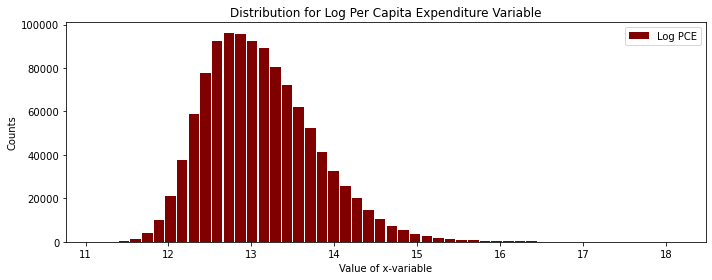

In [48]:
# Histogram for Log Expenditure per Capita Variable

anak_penghasilan=anak_penghasilan.assign(log_exp_cap=np.log(anak_penghasilan['EXP_CAP']))
plot_exp = anak_penghasilan['log_exp_cap']

plot_exp.plot.hist(grid=False, bins=50, rwidth=0.9,color='maroon',label='Log PCE')
plt.title('Distribution for Log Per Capita Expenditure Variable')
plt.xlabel('Value of x-variable')
plt.ylabel('Counts')
plt.legend(loc="best")
plt.tight_layout()
plt.rcParams['figure.figsize'] = [8, 4]
plt.show()

In [100]:
anak_penghasilan.head()

,URUT,B1R1,B1R2,HB,UMUR,KWN,EXP_CAP,WEIND,bps_2009,log_exp_cap,ANAK
2,110112500101601,11,1,3,5,1,3.434643e+05,45.876255,1101,12.746838,True
3,110112500101601,11,1,3,0,1,3.434643e+05,45.876255,1101,12.746838,True
6,110112500101602,11,1,3,9,1,5.703095e+05,55.252186,1101,13.253935,True
7,110112500101602,11,1,3,5,1,5.703095e+05,55.252186,1101,13.253935,True
11,110112500101603,11,1,3,10,1,1.305774e+06,20.006414,1101,14.082306,True


In [83]:
anak_penghasilan['ANAK'] = anak_penghasilan.apply(lambda row: row.UMUR <=
                                  18, axis = 1)

In [84]:
anak_penghasilan

,URUT,B1R1,B1R2,HB,UMUR,KWN,EXP_CAP,WEIND,bps_2009,log_exp_cap,ANAK
0,110112500101601,11,1,1,41,2,3.434643e+05,45.876255,1101,12.746838,False
1,110112500101601,11,1,2,30,2,3.434643e+05,45.876255,1101,12.746838,False
2,110112500101601,11,1,3,5,1,3.434643e+05,45.876255,1101,12.746838,True
3,110112500101601,11,1,3,0,1,3.434643e+05,45.876255,1101,12.746838,True
4,110112500101602,11,1,1,35,2,5.703095e+05,55.252186,1101,13.253935,False
...,...,...,...,...,...,...,...,...,...,...,...
1114440,947122001103810,94,71,2,37,2,1.348310e+06,6.000000,9471,14.114362,False
1114441,947122001103810,94,71,3,10,1,1.348310e+06,6.000000,9471,14.114362,True
1114442,947122001103810,94,71,3,9,1,1.348310e+06,6.000000,9471,14.114362,True
1114443,947122001103810,94,71,7,46,1,1.348310e+06,6.000000,9471,14.114362,False


In [94]:
anak_penghasilan_2 = anak_penghasilan.set_index(["URUT"])

In [95]:
anak_penghasilan_2

,B1R1,B1R2,HB,UMUR,KWN,EXP_CAP,WEIND,bps_2009,log_exp_cap,ANAK
URUT,,,,,,,,,,
110112500101601,11,1,3,5,1,3.434643e+05,45.876255,1101,12.746838,True
110112500101601,11,1,3,0,1,3.434643e+05,45.876255,1101,12.746838,True
110112500101602,11,1,3,9,1,5.703095e+05,55.252186,1101,13.253935,True
110112500101602,11,1,3,5,1,5.703095e+05,55.252186,1101,13.253935,True
110112500101603,11,1,3,10,1,1.305774e+06,20.006414,1101,14.082306,True
...,...,...,...,...,...,...,...,...,...,...
947122001103809,94,71,3,14,1,7.117279e+05,14.112268,9471,13.475451,True
947122001103809,94,71,3,6,1,7.117279e+05,14.112268,9471,13.475451,True
947122001103810,94,71,3,10,1,1.348310e+06,6.000000,9471,14.114362,True


In [96]:
anak_penghasilan_2 = anak_penghasilan_2[anak_penghasilan_2.ANAK]

In [97]:
anak_penghasilan_2

,B1R1,B1R2,HB,UMUR,KWN,EXP_CAP,WEIND,bps_2009,log_exp_cap,ANAK
URUT,,,,,,,,,,
110112500101601,11,1,3,5,1,3.434643e+05,45.876255,1101,12.746838,True
110112500101601,11,1,3,0,1,3.434643e+05,45.876255,1101,12.746838,True
110112500101602,11,1,3,9,1,5.703095e+05,55.252186,1101,13.253935,True
110112500101602,11,1,3,5,1,5.703095e+05,55.252186,1101,13.253935,True
110112500101603,11,1,3,10,1,1.305774e+06,20.006414,1101,14.082306,True
...,...,...,...,...,...,...,...,...,...,...
947122001103809,94,71,3,14,1,7.117279e+05,14.112268,9471,13.475451,True
947122001103809,94,71,3,6,1,7.117279e+05,14.112268,9471,13.475451,True
947122001103810,94,71,3,10,1,1.348310e+06,6.000000,9471,14.114362,True


In [89]:
##anak_penghasilan = anak_penghasilan[anak_penghasilan.ANAK]

In [99]:
##anak_penghasilan

In [102]:
anak_penghasilan_2

,B1R1,B1R2,HB,UMUR,KWN,EXP_CAP,WEIND,bps_2009,log_exp_cap,ANAK
URUT,,,,,,,,,,
110112500101601,11,1,3,5,1,3.434643e+05,45.876255,1101,12.746838,True
110112500101601,11,1,3,0,1,3.434643e+05,45.876255,1101,12.746838,True
110112500101602,11,1,3,9,1,5.703095e+05,55.252186,1101,13.253935,True
110112500101602,11,1,3,5,1,5.703095e+05,55.252186,1101,13.253935,True
110112500101603,11,1,3,10,1,1.305774e+06,20.006414,1101,14.082306,True
...,...,...,...,...,...,...,...,...,...,...
947122001103809,94,71,3,14,1,7.117279e+05,14.112268,9471,13.475451,True
947122001103809,94,71,3,6,1,7.117279e+05,14.112268,9471,13.475451,True
947122001103810,94,71,3,10,1,1.348310e+06,6.000000,9471,14.114362,True


In [109]:
anak_penghasilan_3 = anak_penghasilan_2[anak_penghasilan_2['HB'] == 3]

In [111]:
anak_penghasilan_3.HB.unique()

array([3], dtype=int64)

In [113]:
anak_penghasilan_3

,B1R1,B1R2,HB,UMUR,KWN,EXP_CAP,WEIND,bps_2009,log_exp_cap,ANAK
URUT,,,,,,,,,,
110112500101601,11,1,3,5,1,3.434643e+05,45.876255,1101,12.746838,True
110112500101601,11,1,3,0,1,3.434643e+05,45.876255,1101,12.746838,True
110112500101602,11,1,3,9,1,5.703095e+05,55.252186,1101,13.253935,True
110112500101602,11,1,3,5,1,5.703095e+05,55.252186,1101,13.253935,True
110112500101603,11,1,3,10,1,1.305774e+06,20.006414,1101,14.082306,True
...,...,...,...,...,...,...,...,...,...,...
947122001103809,94,71,3,17,1,7.117279e+05,14.112268,9471,13.475451,True
947122001103809,94,71,3,14,1,7.117279e+05,14.112268,9471,13.475451,True
947122001103809,94,71,3,6,1,7.117279e+05,14.112268,9471,13.475451,True


In [120]:
anak_penghasilan_3 = anak_penghasilan_3.drop(["HB"], axis=1)

In [121]:
anak_penghasilan_3

,B1R1,B1R2,UMUR,KWN,EXP_CAP,WEIND,bps_2009,log_exp_cap,ANAK
URUT,,,,,,,,,
110112500101601,11,1,5,1,3.434643e+05,45.876255,1101,12.746838,True
110112500101601,11,1,0,1,3.434643e+05,45.876255,1101,12.746838,True
110112500101602,11,1,9,1,5.703095e+05,55.252186,1101,13.253935,True
110112500101602,11,1,5,1,5.703095e+05,55.252186,1101,13.253935,True
110112500101603,11,1,10,1,1.305774e+06,20.006414,1101,14.082306,True
...,...,...,...,...,...,...,...,...,...
947122001103809,94,71,17,1,7.117279e+05,14.112268,9471,13.475451,True
947122001103809,94,71,14,1,7.117279e+05,14.112268,9471,13.475451,True
947122001103809,94,71,6,1,7.117279e+05,14.112268,9471,13.475451,True


In [122]:
hasil = anak_penghasilan_3.groupby("URUT").sum()

In [123]:
hasil

,B1R1,B1R2,UMUR,KWN,EXP_CAP,WEIND,bps_2009,log_exp_cap,ANAK
URUT,,,,,,,,,
110112500101601,22,2,5,2,6.869286e+05,91.752510,2202,25.493677,2
110112500101602,22,2,14,2,1.140619e+06,110.504372,2202,26.507869,2
110112500101603,11,1,10,1,1.305774e+06,20.006414,1101,14.082306,1
110112500101604,44,4,28,4,1.607048e+06,169.593475,4404,51.614460,4
110112500101605,22,2,8,2,1.400143e+06,86.840530,2202,26.917875,2
...,...,...,...,...,...,...,...,...,...
947122001103805,188,142,24,2,2.771918e+06,807.413940,18942,28.283806,2
947122001103806,188,142,2,2,3.296419e+06,876.258728,18942,28.630400,2
947122001103807,282,213,39,3,5.877000e+06,963.047974,28413,43.463834,3


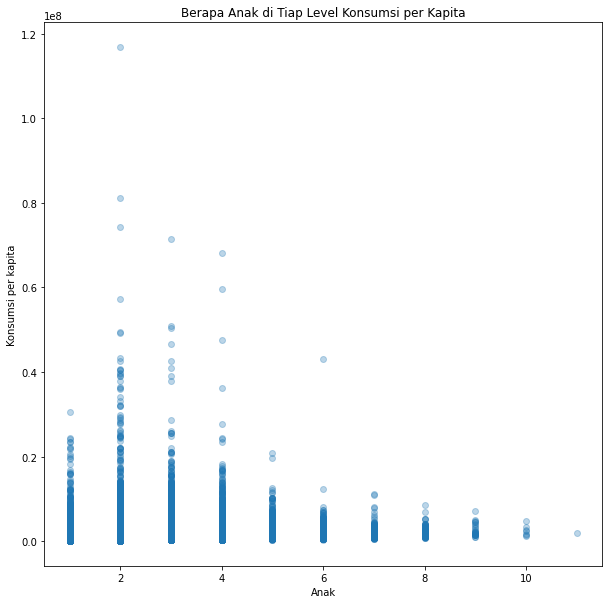

In [126]:
# Anak di setiap Keluarga
x_urut = hasil["ANAK"]
y_anak = hasil["EXP_CAP"]

# Plot
plt.scatter(x_urut, y_anak, alpha=0.3)
plt.title('Berapa Anak di Tiap Level Konsumsi per Kapita')
plt.xlabel('Anak')
plt.ylabel('Konsumsi per kapita')
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

In [ ]:
Grafik di atas menunjukkan data skewed right, dimana tingkat konsumsi per kapita berbanding terbalik dengan jumlah anak di tiap rumah tangganya. 
Hal ini mendukung hipotesis awal dari kami jika keluarga dengan tingkat konsumsi rendah cenderung memiliki anak lebih banyak.

In [129]:
# Subsetting Dataset to Selected Variables
anak = susenas_ki_copy[['URUT','B1R1','B1R2', 'HB', 'UMUR','B1R5','EXP_CAP','WEIND']]

# Creating District Identifier
anak=anak.assign(bps_2009=susenas_ki_copy['B1R1']*100+susenas_ki_copy['B1R2'])
anak.head()

,URUT,B1R1,B1R2,HB,UMUR,B1R5,EXP_CAP,WEIND,bps_2009
0,110112500101601,11,1,1,41,1,343464.285714,45.876255,1101
1,110112500101601,11,1,2,30,1,343464.285714,45.876255,1101
2,110112500101601,11,1,3,5,1,343464.285714,45.876255,1101
3,110112500101601,11,1,3,0,1,343464.285714,45.876255,1101
4,110112500101602,11,1,1,35,1,570309.523810,55.252186,1101


In [130]:
anak['ANAK'] = anak.apply(lambda row: row.UMUR <=
                                  18, axis = 1)

In [ ]:
anak = anak.set_index(["URUT"])

In [135]:
anak.head()

,B1R1,B1R2,HB,UMUR,B1R5,EXP_CAP,WEIND,bps_2009,ANAK
URUT,,,,,,,,,
110112500101601,11,1,1,41,1,343464.285714,45.876255,1101,False
110112500101601,11,1,2,30,1,343464.285714,45.876255,1101,False
110112500101601,11,1,3,5,1,343464.285714,45.876255,1101,True
110112500101601,11,1,3,0,1,343464.285714,45.876255,1101,True
110112500101602,11,1,1,35,1,570309.523810,55.252186,1101,False


In [136]:
anak = anak[anak.ANAK]

In [137]:
anak = anak[anak['HB'] == 3]

In [139]:
anak.HB.unique()

array([3], dtype=int64)

In [140]:
anak = anak.drop(["HB"], axis=1)

In [141]:
anak.head()

,B1R1,B1R2,UMUR,B1R5,EXP_CAP,WEIND,bps_2009,ANAK
URUT,,,,,,,,
110112500101601,11,1,5,1,3.434643e+05,45.876255,1101,True
110112500101601,11,1,0,1,3.434643e+05,45.876255,1101,True
110112500101602,11,1,9,1,5.703095e+05,55.252186,1101,True
110112500101602,11,1,5,1,5.703095e+05,55.252186,1101,True
110112500101603,11,1,10,1,1.305774e+06,20.006414,1101,True


In [142]:
anak.B1R5.unique()

array([1, 2], dtype=int64)

In [143]:
anak_kota = anak[anak['B1R5'] == 1]

In [144]:
anak_kota.B1R5.unique()

array([1], dtype=int64)

In [145]:
anak_desa = anak[anak['B1R5'] == 2]

In [146]:
anak_desa.B1R5.unique()

array([2], dtype=int64)

In [151]:
anak['B1R5']= anak['B1R5'].map(str)

In [154]:
anak.head()

,B1R1,B1R2,UMUR,B1R5,EXP_CAP,WEIND,bps_2009,ANAK
URUT,,,,,,,,
110112500101601,11,1,5,1,3.434643e+05,45.876255,1101,True
110112500101601,11,1,0,1,3.434643e+05,45.876255,1101,True
110112500101602,11,1,9,1,5.703095e+05,55.252186,1101,True
110112500101602,11,1,5,1,5.703095e+05,55.252186,1101,True
110112500101603,11,1,10,1,1.305774e+06,20.006414,1101,True


In [176]:
hasil_2 = anak.groupby(['B1R5', 'URUT'],as_index=False).agg({'ANAK':'sum', 'B1R2':'sum', 'EXP_CAP':'sum' })

In [177]:
hasil_2.head(100)

,B1R5,ANAK,B1R2,EXP_CAP
0,1,2,2,6.869286e+05
1,1,2,2,1.140619e+06
2,1,1,1,1.305774e+06
3,1,4,4,1.607048e+06
4,1,2,2,1.400143e+06
...,...,...,...,...
95,1,1,2,3.426984e+05
96,1,1,2,5.701190e+05
97,1,1,2,5.004138e+05
98,1,3,6,1.083606e+06


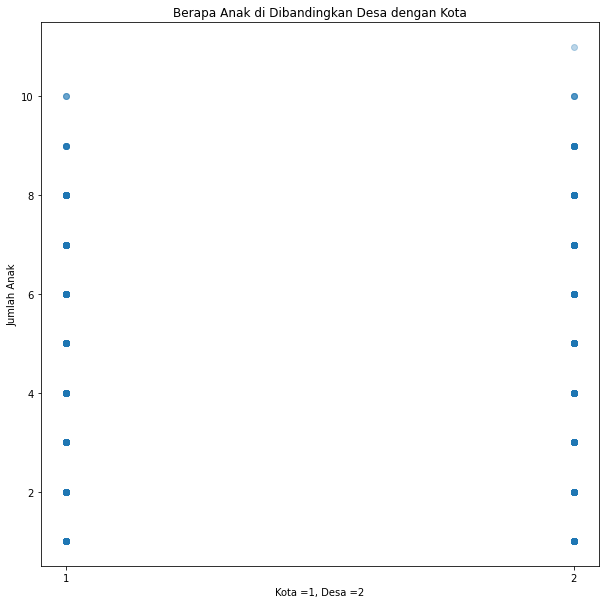

In [179]:
# Anak di setiap Keluarga
x_urut = hasil_2["B1R5"]
y_anak = hasil_2["ANAK"]

# Plot
plt.scatter(x_urut, y_anak, alpha=0.3)
plt.title('Berapa Anak di Dibandingkan Desa dengan Kota')
plt.xlabel('Kota =1, Desa =2')
plt.ylabel('Jumlah Anak')
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

In [ ]:
Di dalam grafik ini tidak ada perbedaan jauh antara jumlah anak untuk penduduk desa dengan penduduk kota

In [181]:
# Subsetting Dataset to Selected Variables
pendidikan = susenas_ki_copy[['URUT','B1R1','B1R2', 'HB', 'UMUR','B1R5', 'B5R15','EXP_CAP','WEIND']]

# Creating District Identifier
pendidikan=pendidikan.assign(bps_2009=susenas_ki_copy['B1R1']*100+susenas_ki_copy['B1R2'])
pendidikan.head()

,URUT,B1R1,B1R2,HB,UMUR,B1R5,B5R15,EXP_CAP,WEIND,bps_2009
0,110112500101601,11,1,1,41,1,7.0,343464.285714,45.876255,1101
1,110112500101601,11,1,2,30,1,7.0,343464.285714,45.876255,1101
2,110112500101601,11,1,3,5,1,1.0,343464.285714,45.876255,1101
3,110112500101601,11,1,3,0,1,NaN,343464.285714,45.876255,1101
4,110112500101602,11,1,1,35,1,4.0,570309.523810,55.252186,1101
